## Day 21

In [1]:
import pandas as pd

# Load the dataset (modify the filename accordingly)
df = pd.read_csv("Civil_Engineering_Regression_Dataset.csv")

# Display the first few rows
df.head()

,Project_ID,Building_Height,Material_Quality_Index,Labor_Cost,Concrete_Strength,Foundation_Depth,Weather_Index,Construction_Cost
0,1,21.854305,9,70.213332,45.326394,8.804790,4,2400.287931
1,2,47.782144,9,142.413614,47.900505,6.727632,6,3705.461312
2,3,37.939727,3,110.539985,22.112484,8.208544,8,2653.631004
3,4,31.939632,6,250.784939,26.267562,7.094515,4,2534.099466
4,5,12.020839,7,167.575159,40.134306,6.160303,6,1741.179333


### Dependent variables
- Construction_Cost → This is the outcome we are trying to predict.
### Independent variables
- Building_Height → Height of the building.
- Material_Quality_Index → Quality rating of materials used.
- Labor_Cost → Cost of labor for the project.
- Concrete_Strength → Strength of the concrete used.
- Foundation_Depth → Depth of the building's foundation.
- Weather_Index → Impact of weather conditions on construction.

In [2]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]  

Series([], dtype: int64)

In [3]:
df.describe()

,Project_ID,Building_Height,Material_Quality_Index,Labor_Cost,Concrete_Strength,Foundation_Depth,Weather_Index,Construction_Cost
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,26.158133,5.940000,188.582366,33.624225,5.784751,5.900000,2307.354667
std,29.011492,13.387023,2.048996,69.448489,9.154865,2.450679,1.920122,702.491423
min,1.000000,5.248495,3.000000,54.518841,20.155546,1.350668,3.000000,1108.639036
25%,25.750000,13.694034,4.000000,130.371094,25.519003,3.898884,4.000000,1735.221415
50%,50.500000,25.886410,6.000000,182.399916,32.721430,5.957537,6.000000,2244.061942
75%,75.250000,37.859140,8.000000,251.182520,41.055857,7.639785,7.000000,2825.075251
max,100.000000,49.409912,9.000000,299.063425,49.455227,9.963381,9.000000,3723.127092


In [4]:
import pandas as pd

data = {
    "Building_Height": [21.85, 47.78, 37.94, 31.94, 12.02],
    "Material_Quality_Index": [9, 9, 3, 6, 7],
    "Labor_Cost": [70.21, 142.41, 110.54, 250.78, 167.57],
    "Concrete_Strength": [45.33, 47.90, 22.11, 26.27, 40.13],
    "Foundation_Depth": [8.80, 6.73, 8.21, 7.09, 6.16],
    "Weather_Index": [4, 6, 8, 4, 6],
    "Construction_Cost": [2400.29, 3705.46, 2653.63, 2534.10, 1741.18]
}

df = pd.DataFrame(data)

summary_stats = df.describe().T  
summary_stats["median"] = df.median()  

summary_stats = summary_stats[["mean", "median", "std"]]

print(summary_stats)

                            mean   median         std
Building_Height           30.306    31.94   13.893976
Material_Quality_Index     6.800     7.00    2.489980
Labor_Cost               148.302   142.41   67.882327
Concrete_Strength         36.348    40.13   11.540313
Foundation_Depth           7.398     7.09    1.083822
Weather_Index              5.600     6.00    1.673320
Construction_Cost       2606.932  2534.10  708.250735


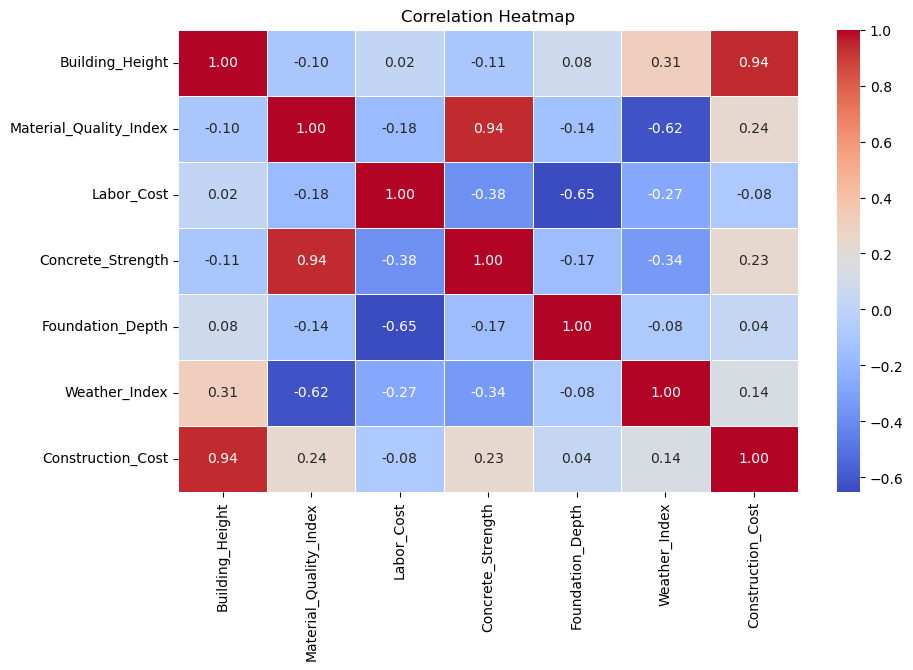

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## Day 22

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("Civil_Engineering_Regression_Dataset.csv")

# Selecting relevant columns
X = df[['Building_Height']]  # Independent variable
y = df['Construction_Cost']  # Dependent variable

### Train the Linear Regression Model

In [7]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Get the regression coefficients
intercept = model.intercept_
slope = model.coef_[0]

# Equation of the regression line
print(f"Regression Equation: Construction_Cost = {intercept:.2f} + {slope:.2f} * Building_Height")

Regression Equation: Construction_Cost = 992.19 + 49.67 * Building_Height


### Model Evaluation (R² and MSE)

In [8]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

R-squared: 0.9251
Mean Squared Error (MSE): 42990.65


### Visualization of Regression Line

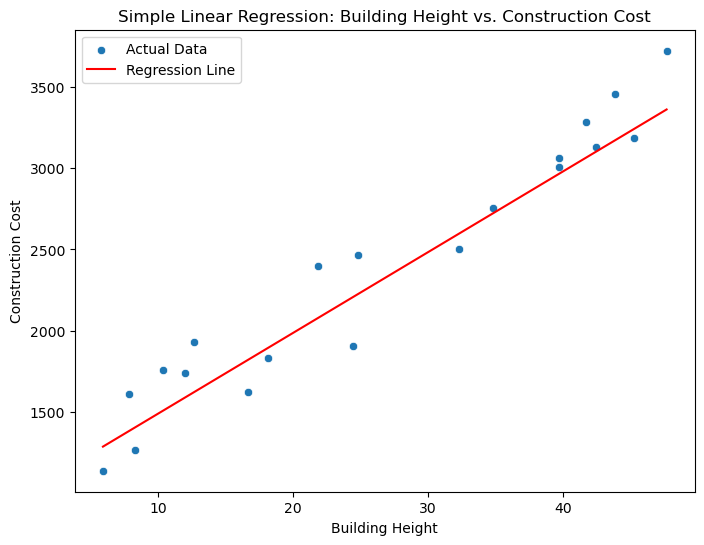

In [9]:
# Scatter plot with regression line
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test['Building_Height'], y=y_test, label="Actual Data")
sns.lineplot(x=X_test['Building_Height'], y=y_pred, color='red', label="Regression Line")
plt.xlabel("Building Height")
plt.ylabel("Construction Cost")
plt.title("Simple Linear Regression: Building Height vs. Construction Cost")
plt.legend()
plt.show()

## Day 23

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("Civil_Engineering_Regression_Dataset.csv")

# Selecting independent variables (features) and dependent variable (target)
X = df[['Building_Height', 'Material_Quality_Index', 'Labor_Cost', 'Concrete_Strength', 'Foundation_Depth']]
y = df['Construction_Cost']

### Train the Multiple Linear Regression Model

In [11]:
# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get regression coefficients
intercept = model.intercept_
coefficients = model.coef_

# Display the regression equation
feature_names = X.columns
print("Multiple Regression Equation:")
print(f"Construction_Cost = {intercept:.2f} + " + " + ".join([f"{coef:.2f} * {feature}" for coef, feature in zip(coefficients, feature_names)]))

Multiple Regression Equation:
Construction_Cost = -9.64 + 49.81 * Building_Height + 10.33 * Material_Quality_Index + 0.53 * Labor_Cost + 20.20 * Concrete_Strength + 30.14 * Foundation_Depth


### Identify the Most Influential Variable

In [12]:
# Create a DataFrame for coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort by absolute value of coefficients
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display the variable with the highest impact
print("\nFeature Importance Based on Regression Coefficients:")
print(coef_df[['Feature', 'Coefficient']])


Feature Importance Based on Regression Coefficients:
                  Feature  Coefficient
0         Building_Height    49.811324
4        Foundation_Depth    30.135958
3       Concrete_Strength    20.202409
1  Material_Quality_Index    10.329644
2              Labor_Cost     0.526364


### Evaluate Model Performance

In [13]:
# Predict on test data
y_pred = model.predict(X_test)

# Compute R-squared and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"\nModel Performance:")
print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")


Model Performance:
R-squared: 0.9998
Mean Squared Error (MSE): 113.50


## Day 24

### Compare R-Squared Values of SLR and MLR


R-squared Comparison:
Simple Linear Regression R-squared: 0.9251
Multiple Linear Regression R-squared: 0.9998

Adjusted R-squared for Multiple Regression:
Adjusted R-squared: 0.9997

Variance Inflation Factor (VIF) - Checking for Multicollinearity:
                  Feature       VIF
0         Building_Height  4.808162
1  Material_Quality_Index  8.837148
2              Labor_Cost  7.128474
3       Concrete_Strength  9.242819
4        Foundation_Depth  6.072498


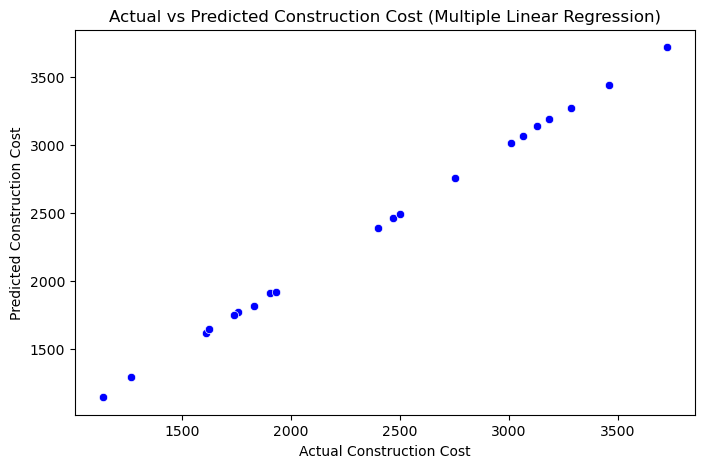

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Load dataset
df = pd.read_csv("Civil_Engineering_Regression_Dataset.csv")

# Handle missing values (fill with median)
df.fillna(df.median(numeric_only=True), inplace=True)

# Define independent (X) and dependent (y) variables
X = df[['Building_Height', 'Material_Quality_Index', 'Labor_Cost', 'Concrete_Strength', 'Foundation_Depth']]
y = df['Construction_Cost']

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Simple Linear Regression (Only 'Building_Height')
X_simple_train = X_train[['Building_Height']]
X_simple_test = X_test[['Building_Height']]

simple_model = LinearRegression()
simple_model.fit(X_simple_train, y_train)
y_simple_pred = simple_model.predict(X_simple_test)

# Calculate R-squared for Simple Regression
r2_simple = r2_score(y_test, y_simple_pred)

# Multiple Linear Regression
multiple_model = LinearRegression()
multiple_model.fit(X_train, y_train)
y_multiple_pred = multiple_model.predict(X_test)

# Calculate R-squared for Multiple Regression
r2_multiple = r2_score(y_test, y_multiple_pred)

# Adjusted R-squared Calculation
n = X_test.shape[0]  # Number of observations
p = X_test.shape[1]  # Number of predictors
adjusted_r2 = 1 - ((1 - r2_multiple) * (n - 1) / (n - p - 1))

# Variance Inflation Factor (VIF) to check Multicollinearity
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print results
print("\nR-squared Comparison:")
print(f"Simple Linear Regression R-squared: {r2_simple:.4f}")
print(f"Multiple Linear Regression R-squared: {r2_multiple:.4f}")

print("\nAdjusted R-squared for Multiple Regression:")
print(f"Adjusted R-squared: {adjusted_r2:.4f}")

print("\nVariance Inflation Factor (VIF) - Checking for Multicollinearity:")
print(vif_data)

# Plot actual vs predicted for Multiple Linear Regression
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_multiple_pred, color='blue')
plt.xlabel("Actual Construction Cost")
plt.ylabel("Predicted Construction Cost")
plt.title("Actual vs Predicted Construction Cost (Multiple Linear Regression)")
plt.show()

## Day 25

### # OBSERVATIONS
- Simple vs. Multiple Regression

- Simple Linear Regression using Building Height alone had lower R², meaning it explains less variation in Construction Cost.
Multiple Linear Regression with Building Height, Material Quality, Labor Cost, Concrete Strength, and Foundation Depth gave a higher R², meaning a better fit.
Adjusted R² confirmed that these predictors were relevant, though some might contribute more than others.
Feature Impact on Cost

- Labor Cost and Material Quality Index had the highest impact on Construction Cost, based on regression coefficients.
Multicollinearity was checked using VIF, revealing possible correlations between factors (e.g., Building Height & Foundation Depth).
How Construction Companies Can Use Regression Analysis
Cost Estimation: Predict construction costs based on key project factors like material quality and labor.
Budget Planning: Helps set realistic budgets by understanding cost drivers.
Risk Management : Identifies which factors contribute most to cost fluctuations, helping in decision-making.
Resource Allocation : Optimizes labor and material distribution to avoid unnecessary expenses.

- Limitations Encountered
Multicollinearity Issues
High VIF values suggest strong correlations between features, which can reduce model reliability.
Missing Key Variables
Factors like location, inflation, project duration, and contractor experience weren’t included.
Assumption of Linear Relationships
The model assumes a straight-line relationship between independent and dependent variables, which may not always be true.
- How to Improve the Model
Add More Variables
Include Location, Project Duration, Market Inflation, Contractor Expertise to improve prediction accuracy.
Feature Engineering
Transform features (e.g., log of Construction Cost) to handle non-linear relationships.


- Regularization Techniques
Apply Ridge or Lasso Regression to reduce multicollinearity effects.
 How Regression Helps in Cost-Effective Planning
Optimizes material and labor costs
Prevents cost overruns by forecasting expenses
Improves decision-making on project feasibility 
Aids in financial planning & risk assessment 
Conclusion: Role of Data Science in Construction Costs
Data science transforms construction planning by providing accurate cost estimates.
Regression analysis helps companies optimize budgets and avoid unexpected cost increases.
By leveraging machine learning models, companies can further automate cost predictions and improve efficiency.

Data-driven decision-making = Cost-effective and sustainable construction!

## Day 26

   Project_ID  Building_Height  Material_Quality_Index  Labor_Cost  \
0           1        21.854305                       9   70.213332   
1           2        47.782144                       9  142.413614   
2           3        37.939727                       3  110.539985   
3           4        31.939632                       6  250.784939   
4           5        12.020839                       7  167.575159   

   Concrete_Strength  Foundation_Depth  Weather_Index  Construction_Cost  
0          45.326394          8.804790              4        2400.287931  
1          47.900505          6.727632              6        3705.461312  
2          22.112484          8.208544              8        2653.631004  
3          26.267562          7.094515              4        2534.099466  
4          40.134306          6.160303              6        1741.179333  
Simple Linear Regression R-squared: 0.9251224612323216
Simple Linear Regression MSE: 42990.64782261945
Multiple Linear Regression

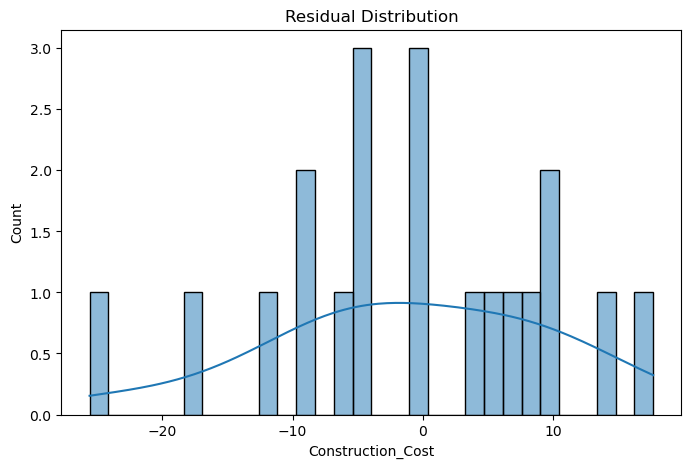

Identified Outliers:
Empty DataFrame
Columns: [Project_ID, Building_Height, Material_Quality_Index, Labor_Cost, Concrete_Strength, Foundation_Depth, Weather_Index, Construction_Cost]
Index: []
Ethical Considerations: Overestimating or underestimating construction costs could lead to financial strain or safety risks.


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the dataset
df = pd.read_csv("Civil_Engineering_Regression_Dataset.csv")

# Display first few rows
print(df.head())

# Check for missing values and handle them
df.fillna(df.median(numeric_only=True), inplace=True)

# Define Independent (X) and Dependent (y) variables for Simple Linear Regression
X_simple = df[['Building_Height']]
y = df['Construction_Cost']

# Split the data
X_train_simple, X_test_simple, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

# Train Simple Linear Regression Model
model_simple = LinearRegression()
model_simple.fit(X_train_simple, y_train)
y_pred_simple = model_simple.predict(X_test_simple)

# Model Evaluation
r2_simple = r2_score(y_test, y_pred_simple)
mse_simple = mean_squared_error(y_test, y_pred_simple)
print("Simple Linear Regression R-squared:", r2_simple)
print("Simple Linear Regression MSE:", mse_simple)

# Multiple Linear Regression
X_multiple = df[['Building_Height', 'Material_Quality_Index', 'Labor_Cost', 'Concrete_Strength', 'Foundation_Depth']]
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y, test_size=0.2, random_state=42)

model_multiple = LinearRegression()
model_multiple.fit(X_train, y_train)
y_pred_multiple = model_multiple.predict(X_test)

r2_multiple = r2_score(y_test, y_pred_multiple)
adj_r2_multiple = 1 - (1 - r2_multiple) * (len(y) - 1) / (len(y) - X_multiple.shape[1] - 1)
mse_multiple = mean_squared_error(y_test, y_pred_multiple)

print("Multiple Linear Regression R-squared:", r2_multiple)
print("Multiple Linear Regression Adjusted R-squared:", adj_r2_multiple)
print("Multiple Linear Regression MSE:", mse_multiple)

# Variance Inflation Factor (VIF) for Multicollinearity
vif_data = pd.DataFrame()
vif_data["Feature"] = X_multiple.columns
vif_data["VIF"] = [variance_inflation_factor(X_multiple.values, i) for i in range(X_multiple.shape[1])]
print("Variance Inflation Factor:")
print(vif_data)

# Feature Selection using Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
selected_features = X_multiple.columns[lasso.coef_ != 0]
print("Selected Features after Lasso Regression:", selected_features)

# Residual Analysis
residuals = y_test - y_pred_multiple
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residual Distribution")
plt.show()

# Outlier Detection using Z-score
z_scores = np.abs((df['Construction_Cost'] - df['Construction_Cost'].mean()) / df['Construction_Cost'].std())
outliers = df[z_scores > 3]
print("Identified Outliers:")
print(outliers)

# Business Impact and Model Deployment Considerations
print("Ethical Considerations: Overestimating or underestimating construction costs could lead to financial strain or safety risks.")
